<a href="https://colab.research.google.com/github/Khoa-hub-commits/PERCEPTION/blob/main/NH%C3%93M10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏥 HỆ THỐNG CHẨN ĐOÁN DINH DƯỠNG TRẺ EM - PERCEPTRON
📊 Đang tạo dữ liệu mô phỏng...
Đã tạo 1000 mẫu dữ liệu
Tỷ lệ suy dinh dưỡng: 15.30%

🔧 Chuẩn bị features cho Perceptron...
Features sử dụng:
  1. age_months
  2. height_cm
  3. weight_kg
  4. gender
  5. bmi
  6. weight_height_ratio
  7. age_squared

🤖 Đang huấn luyện Perceptron...
Hoàn thành huấn luyện!

ĐÁNH GIÁ MÔ HÌNH PERCEPTRON
Độ chính xác Training: 0.9871
Độ chính xác Testing:  0.9833

Chi tiết phân loại (Test set):
                precision    recall  f1-score   support

   Bình thường       0.99      0.99      0.99       254
Suy dinh dưỡng       0.94      0.96      0.95        46

      accuracy                           0.98       300
     macro avg       0.96      0.97      0.97       300
  weighted avg       0.98      0.98      0.98       300


Trọng số các features trong Perceptron:
  age_months          :   0.2084
  height_cm           :   0.3445
  weight_kg           :  -0.3585
  gender              :  -0.1443
  bmi    

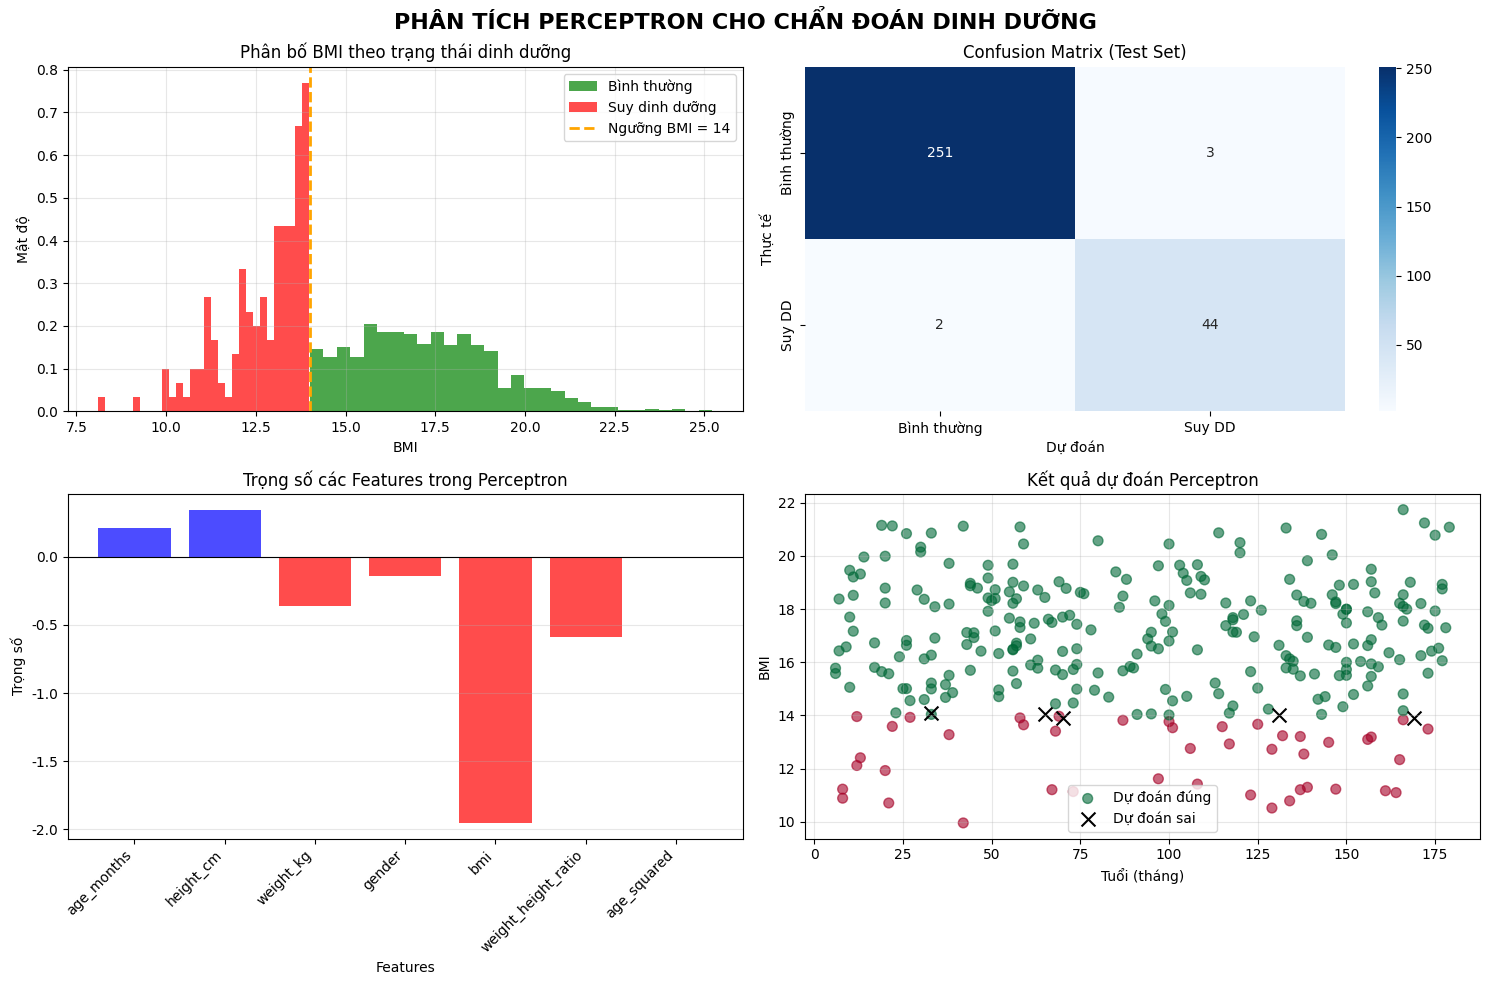


🩺 DEMO CHẨN ĐOÁN
Ví dụ 1 - Bé gái 3 tuổi:
  Tuổi: 36 tháng, Chiều cao: 95cm, Cân nặng: 14kg
  BMI: 15.51
  Trạng thái: Hơi thiếu cân
  Dự đoán Perceptron: Bình thường
  Mức độ rủi ro: Thấp
  Decision score: -1.107

Ví dụ 2 - Bé trai 2 tuổi:
  Tuổi: 24 tháng, Chiều cao: 82cm, Cân nặng: 9kg
  BMI: 13.38
  Trạng thái: Suy dinh dưỡng vừa
  Dự đoán Perceptron: Suy dinh dưỡng
  Mức độ rủi ro: Cao
  Decision score: 0.569



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Cấu hình matplotlib cho tiếng Việt
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# =========================
# 1. TẠO DỮ LIỆU MÔ PHỎNG
# =========================

def create_synthetic_data(n_samples=1000):
    """Tạo dữ liệu mô phỏng cho chẩn đoán dinh dưỡng trẻ em"""
    np.random.seed(42)

    # Tạo dữ liệu cơ bản
    age_months = np.random.randint(6, 180, n_samples)  # 6 tháng - 15 tuổi
    gender = np.random.choice([0, 1], n_samples)  # 0: nữ, 1: nam

    # Chiều cao dự kiến theo tuổi
    expected_height = np.where(age_months <= 12,
                              65 + (age_months - 6) * 1.2,  # 0-1 tuổi
                              75 + (age_months - 12) * 0.6)  # > 1 tuổi

    # Thêm noise cho chiều cao
    height_cm = expected_height + np.random.normal(0, 3, n_samples)
    height_cm = np.clip(height_cm, 45, 200)

    # BMI tiềm ẩn và cân nặng
    bmi_latent = np.random.normal(16.5, 2.5, n_samples)
    bmi_latent = np.clip(bmi_latent, 10, 25)

    weight_kg = bmi_latent * (height_cm / 100) ** 2
    weight_kg += np.random.normal(0, 0.5, n_samples)
    weight_kg = np.clip(weight_kg, 3, 120)

    # Tính BMI thực tế
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14), 0 = bình thường
    label = (bmi < 14).astype(int)

    return pd.DataFrame({
        'age_months': age_months,
        'height_cm': height_cm.round(1),
        'weight_kg': weight_kg.round(2),
        'gender': gender,
        'bmi': bmi.round(2),
        'malnutrition': label
    })

# =========================
# 2. CHUẨN BỊ DỮ LIỆU CHO PERCEPTRON
# =========================

def prepare_features(df):
    """Chuẩn bị features cho mô hình Perceptron"""
    features = df[['age_months', 'height_cm', 'weight_kg', 'gender', 'bmi']].copy()

    # Thêm feature tương tác
    features['weight_height_ratio'] = features['weight_kg'] / features['height_cm']
    features['age_squared'] = features['age_months'] ** 2

    return features

# =========================
# 3. XÂY DỰNG VÀ ĐÁNH GIÁ PERCEPTRON
# =========================

def build_perceptron_model(X, y):
    """Xây dựng và huấn luyện mô hình Perceptron"""

    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Tạo pipeline với StandardScaler và Perceptron
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('perceptron', Perceptron(
            max_iter=1000,
            tol=1e-3,
            random_state=42,
            eta0=0.1  # learning rate
        ))
    ])

    # Huấn luyện
    model.fit(X_train, y_train)

    # Dự đoán
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return model, (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

def evaluate_model(model, data_splits):
    """Đánh giá hiệu suất mô hình Perceptron"""
    X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = data_splits

    print("=" * 50)
    print("ĐÁNH GIÁ MÔ HÌNH PERCEPTRON")
    print("=" * 50)

    # Độ chính xác
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Độ chính xác Training: {train_acc:.4f}")
    print(f"Độ chính xác Testing:  {test_acc:.4f}")
    print()

    # Classification report
    print("Chi tiết phân loại (Test set):")
    print(classification_report(y_test, y_test_pred,
                              target_names=['Bình thường', 'Suy dinh dưỡng']))

    # Trọng số của Perceptron
    print("\nTrọng số các features trong Perceptron:")
    feature_names = ['age_months', 'height_cm', 'weight_kg', 'gender', 'bmi', 'weight_height_ratio', 'age_squared']
    weights = model.named_steps['perceptron'].coef_[0]

    for name, weight in zip(feature_names, weights):
        print(f"  {name:20s}: {weight:8.4f}")

    print(f"\nBias (intercept): {model.named_steps['perceptron'].intercept_[0]:.4f}")

    return train_acc, test_acc

# =========================
# 4. TRỰC QUAN HÓA
# =========================

def plot_analysis(df, model, data_splits):
    """Vẽ các biểu đồ phân tích"""
    X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = data_splits

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('PHÂN TÍCH PERCEPTRON CHO CHẨN ĐOÁN DINH DƯỠNG', fontsize=16, fontweight='bold')

    # 1. Phân bố BMI theo nhãn
    ax1 = axes[0, 0]
    normal = df[df['malnutrition'] == 0]['bmi']
    malnutrition = df[df['malnutrition'] == 1]['bmi']

    ax1.hist(normal, bins=30, alpha=0.7, label='Bình thường', color='green', density=True)
    ax1.hist(malnutrition, bins=30, alpha=0.7, label='Suy dinh dưỡng', color='red', density=True)
    ax1.axvline(14, color='orange', linestyle='--', linewidth=2, label='Ngưỡng BMI = 14')
    ax1.set_xlabel('BMI')
    ax1.set_ylabel('Mật độ')
    ax1.set_title('Phân bố BMI theo trạng thái dinh dưỡng')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # 2. Confusion Matrix
    ax2 = axes[0, 1]
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
                xticklabels=['Bình thường', 'Suy DD'],
                yticklabels=['Bình thường', 'Suy DD'])
    ax2.set_title('Confusion Matrix (Test Set)')
    ax2.set_xlabel('Dự đoán')
    ax2.set_ylabel('Thực tế')

    # 3. Trọng số features
    ax3 = axes[1, 0]
    feature_names = ['age_months', 'height_cm', 'weight_kg', 'gender', 'bmi', 'weight_height_ratio', 'age_squared']
    weights = model.named_steps['perceptron'].coef_[0]

    colors = ['red' if w < 0 else 'blue' for w in weights]
    bars = ax3.bar(range(len(weights)), weights, color=colors, alpha=0.7)
    ax3.set_xlabel('Features')
    ax3.set_ylabel('Trọng số')
    ax3.set_title('Trọng số các Features trong Perceptron')
    ax3.set_xticks(range(len(feature_names)))
    ax3.set_xticklabels(feature_names, rotation=45, ha='right')
    ax3.grid(axis='y', alpha=0.3)
    ax3.axhline(0, color='black', linewidth=0.8)

    # 4. Scatter plot: BMI vs Age với dự đoán
    ax4 = axes[1, 1]

    # Test set points
    correct_mask = (y_test == y_test_pred)
    incorrect_mask = ~correct_mask

    # Điểm dự đoán đúng
    ax4.scatter(X_test.loc[correct_mask, 'age_months'], X_test.loc[correct_mask, 'bmi'],
               c=y_test[correct_mask], cmap='RdYlGn_r', alpha=0.6,
               marker='o', s=50, label='Dự đoán đúng')

    # Điểm dự đoán sai
    ax4.scatter(X_test.loc[incorrect_mask, 'age_months'], X_test.loc[incorrect_mask, 'bmi'],
               c='black', marker='x', s=100, label='Dự đoán sai')


    ax4.set_xlabel('Tuổi (tháng)')
    ax4.set_ylabel('BMI')
    ax4.set_title('Kết quả dự đoán Perceptron')
    ax4.legend()
    ax4.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# =========================
# 5. HÀM CHẨN ĐOÁN ĐƠN GIẢN
# =========================

def diagnose_child(model, age_months, height_cm, weight_kg, gender=0):
    """Chẩn đoán dinh dưỡng cho một trẻ em"""

    # Tính BMI
    bmi = weight_kg / (height_cm / 100) ** 2

    # Chuẩn bị features
    weight_height_ratio = weight_kg / height_cm
    age_squared = age_months ** 2

    features = np.array([[age_months, height_cm, weight_kg, gender, bmi, weight_height_ratio, age_squared]])

    # Dự đoán
    prediction = model.predict(features)[0]
    probability = model.decision_function(features)[0]  # Decision function score

    # Phân loại chi tiết theo BMI
    if bmi < 12:
        status = "Suy dinh dưỡng nặng"
    elif bmi < 14:
        status = "Suy dinh dưỡng vừa"
    elif bmi < 16:
        status = "Hơi thiếu cân"
    elif bmi < 18.5:
        status = "Bình thường"
    elif bmi < 23:
        status = "Hơi thừa cân"
    elif bmi < 27.5:
        status = "Thừa cân"
    else:
        status = "Béo phì"

    return {
        'bmi': round(bmi, 2),
        'prediction': prediction,
        'status': status,
        'decision_score': round(probability, 3),
        'risk_level': 'Cao' if prediction == 1 else 'Thấp'
    }

# =========================
# 6. CHẠY CHƯƠNG TRÌNH CHÍNH
# =========================

def main():
    print("🏥 HỆ THỐNG CHẨN ĐOÁN DINH DƯỠNG TRẺ EM - PERCEPTRON")
    print("=" * 60)

    # Tạo dữ liệu
    print("📊 Đang tạo dữ liệu mô phỏng...")
    df = create_synthetic_data(1000)
    print(f"Đã tạo {len(df)} mẫu dữ liệu")
    print(f"Tỷ lệ suy dinh dưỡng: {df['malnutrition'].mean():.2%}")
    print()

    # Chuẩn bị features
    print("🔧 Chuẩn bị features cho Perceptron...")
    X = prepare_features(df)
    y = df['malnutrition']

    print("Features sử dụng:")
    for i, col in enumerate(X.columns):
        print(f"  {i+1}. {col}")
    print()

    # Xây dựng mô hình
    print("🤖 Đang huấn luyện Perceptron...")
    model, data_splits = build_perceptron_model(X, y)
    print("Hoàn thành huấn luyện!")
    print()

    # Đánh giá mô hình
    train_acc, test_acc = evaluate_model(model, data_splits)
    print()

    # Vẽ biểu đồ phân tích
    print("📈 Đang tạo biểu đồ phân tích...")
    plot_analysis(df, model, data_splits)

    # Demo chẩn đoán
    print("\n" + "=" * 60)
    print("🩺 DEMO CHẨN ĐOÁN")
    print("=" * 60)

    # Ví dụ 1: Trẻ bình thường
    result1 = diagnose_child(model, age_months=36, height_cm=95, weight_kg=14, gender=0)
    print("Ví dụ 1 - Bé gái 3 tuổi:")
    print(f"  Tuổi: 36 tháng, Chiều cao: 95cm, Cân nặng: 14kg")
    print(f"  BMI: {result1['bmi']}")
    print(f"  Trạng thái: {result1['status']}")
    print(f"  Dự đoán Perceptron: {'Suy dinh dưỡng' if result1['prediction'] == 1 else 'Bình thường'}")
    print(f"  Mức độ rủi ro: {result1['risk_level']}")
    print(f"  Decision score: {result1['decision_score']}")
    print()

    # Ví dụ 2: Trẻ suy dinh dưỡng
    result2 = diagnose_child(model, age_months=24, height_cm=82, weight_kg=9, gender=1)
    print("Ví dụ 2 - Bé trai 2 tuổi:")
    print(f"  Tuổi: 24 tháng, Chiều cao: 82cm, Cân nặng: 9kg")
    print(f"  BMI: {result2['bmi']}")
    print(f"  Trạng thái: {result2['status']}")
    print(f"  Dự đoán Perceptron: {'Suy dinh dưỡng' if result2['prediction'] == 1 else 'Bình thường'}")
    print(f"  Mức độ rủi ro: {result2['risk_level']}")
    print(f"  Decision score: {result2['decision_score']}")
    print()

    return model, df

# =========================
# 7. HÀM TƯƠNG TÁC CHẨN ĐOÁN
# =========================

def interactive_diagnosis(model):
    """Hàm chẩn đoán tương tác"""
    print("\n" + "=" * 60)
    print("💬 CHẨN ĐOÁN TƯƠNG TÁC")
    print("=" * 60)
    print("Nhập thông tin trẻ em để chẩn đoán (nhập 'quit' để thoát)")

    while True:
        try:
            print("\n--- Nhập thông tin ---")

            # Nhập thông tin
            age_input = input("Tuổi (tháng): ")
            if age_input.lower() == 'quit':
                break

            age_months = int(age_input)
            height_cm = float(input("Chiều cao (cm): "))
            weight_kg = float(input("Cân nặng (kg): "))
            gender_input = input("Giới tính (0=nữ, 1=nam): ")
            gender = int(gender_input)

            # Chẩn đoán
            result = diagnose_child(model, age_months, height_cm, weight_kg, gender)

            # Hiển thị kết quả
            print("\n--- KẾT QUẢ CHẨN ĐOÁN ---")
            print(f"BMI: {result['bmi']}")
            print(f"Trạng thái: {result['status']}")
            print(f"Dự đoán Perceptron: {'⚠️  Suy dinh dưỡng' if result['prediction'] == 1 else '✅ Bình thường'}")
            print(f"Mức độ rủi ro: {result['risk_level']}")
            print(f"Decision score: {result['decision_score']}")

            # Gợi ý
            if result['prediction'] == 1:
                print("\n🔴 KHUYẾN NGHỊ:")
                print("- Tăng cường dinh dưỡng: 85-100 kcal/kg/ngày")
                print("- Ăn nhiều bữa nhỏ trong ngày")
                print("- Bổ sung protein: thịt, cá, trứng, sữa")
                print("- Theo dõi cân nặng hàng tuần")
                print("- Tham khảo bác sĩ chuyên khoa")
            else:
                print("\n🟢 KHUYẾN NGHỊ:")
                print("- Duy trì chế độ ăn cân bằng")
                print("- Vận động đều đặn ≥ 60 phút/ngày")
                print("- Theo dõi định kỳ")

        except ValueError:
            print("❌ Lỗi: Vui lòng nhập số hợp lệ")
        except KeyboardInterrupt:
            print("\nTạm biệt!")
            break
        except Exception as e:
            print(f"❌ Lỗi: {e}")

# =========================
# 8. CHẠY CHƯƠNG TRÌNH
# =========================

if __name__ == "__main__":
    # Chạy chương trình chính
    model, df = main()

    # Chế độ tương tác (tùy chọn)
    run_interactive = input("\nBạn có muốn chạy chế độ chẩn đoán tương tác? (y/n): ")
    if run_interactive.lower() in ['y', 'yes', 'có']:
        interactive_diagnosis(model)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ===== TẠO DỮ LIỆU HUẤN LUYỆN =====
def create_training_data():
    """Tạo dữ liệu huấn luyện cho Perceptron"""
    np.random.seed(42)
    n = 1000

    # Sinh dữ liệu cơ bản
    age_months = np.random.randint(6, 180, n)
    height_cm = 60 + age_months * 0.7 + np.random.normal(0, 8, n)
    height_cm = np.clip(height_cm, 50, 180)

    # Tạo BMI và cân nặng
    bmi_target = np.random.normal(16.5, 3, n)
    weight_kg = bmi_target * (height_cm / 100) ** 2
    weight_kg = np.clip(weight_kg, 3, 80)

    # Tính BMI thực tế
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14.5)
    y = (bmi < 14.5).astype(int)

    # Features cho Perceptron
    X = np.column_stack([
        age_months,
        height_cm,
        weight_kg,
        bmi,
        weight_kg / height_cm  # tỷ lệ cân nặng/chiều cao
    ])

    return X, y

# ===== LỚP PERCEPTRON CHẨN ĐOÁN =====
class DiagnosisPerceptron:
    def __init__(self):
        self.scaler = StandardScaler()
        self.perceptron = Perceptron(max_iter=1000, random_state=42)
        self.trained = False

    def train(self):
        """Huấn luyện Perceptron"""
        print("🤖 Đang huấn luyện Perceptron...")

        # Tạo dữ liệu
        X, y = create_training_data()

        # Chia train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Chuẩn hóa và huấn luyện
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.perceptron.fit(X_train_scaled, y_train)

        # Đánh giá
        train_acc = accuracy_score(y_train, self.perceptron.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, self.perceptron.predict(X_test_scaled))

        print(f"✅ Huấn luyện xong! Độ chính xác: {test_acc:.3f}")
        print(f"📊 Tỷ lệ suy dinh dưỡng: {y.mean():.2%}")

        # Hiển thị trọng số Perceptron
        print(f"\n🔍 Trọng số Perceptron:")
        features = ['Tuổi', 'Chiều cao', 'Cân nặng', 'BMI', 'Tỷ lệ C.nặng/C.cao']
        for i, (feature, weight) in enumerate(zip(features, self.perceptron.coef_[0])):
            print(f"  {feature:15s}: {weight:7.3f}")
        print(f"  {'Bias':15s}: {self.perceptron.intercept_[0]:7.3f}")

        self.trained = True
        return test_acc

    def predict(self, age_months, height_cm, weight_kg):
        """Dự đoán bằng Perceptron"""
        if not self.trained:
            print("❌ Chưa huấn luyện! Chạy .train() trước")
            return None

        # Tính BMI và features
        bmi = weight_kg / (height_cm / 100) ** 2
        ratio = weight_kg / height_cm

        # Chuẩn bị input
        X = np.array([[age_months, height_cm, weight_kg, bmi, ratio]])
        X_scaled = self.scaler.transform(X)

        # Dự đoán Perceptron
        prediction = self.perceptron.predict(X_scaled)[0]
        decision_score = self.perceptron.decision_function(X_scaled)[0]

        return {
            'bmi': round(bmi, 2),
            'perceptron_result': prediction,
            'confidence': abs(decision_score),
            'decision_score': decision_score
        }

# ===== GIAO DIỆN CHẨN ĐOÁN ĐƠN GIẢN =====
def diagnose_interface():
    """Giao diện chẩn đoán đơn giản"""

    # Khởi tạo và huấn luyện
    model = DiagnosisPerceptron()
    model.train()

    print("\n" + "="*50)
    print("🏥 CHẨN ĐOÁN SUY DINH DƯỠNG - PERCEPTRON")
    print("="*50)

    while True:
        try:
            print(f"\n📝 Nhập thông tin (hoặc 'q' để thoát):")

            # Input
            age_input = input("🎂 Tuổi (tháng): ")
            if age_input.lower() in ['q', 'quit', 'thoát']:
                break

            age = int(age_input)
            height = float(input("📏 Chiều cao (cm): "))
            weight = float(input("⚖️  Cân nặng (kg): "))

            # Validate
            if not (6 <= age <= 180):
                print("❌ Tuổi phải từ 6-180 tháng")
                continue
            if not (40 <= height <= 200):
                print("❌ Chiều cao phải từ 40-200cm")
                continue
            if not (2 <= weight <= 100):
                print("❌ Cân nặng phải từ 2-100kg")
                continue

            # Chẩn đoán
            result = model.predict(age, height, weight)

            # Hiển thị kết quả
            print(f"\n🩺 KẾT QUẢ:")
            print(f"├─ BMI: {result['bmi']}")

            # Phân loại BMI
            bmi = result['bmi']
            if bmi < 14.5:
                status = "🔴 Suy dinh dưỡng"
                advice = "Cần tăng cường dinh dưỡng ngay!"
            elif bmi < 16:
                status = "🟡 Hơi thiếu cân"
                advice = "Cần cải thiện chế độ ăn"
            elif bmi < 23:
                status = "🟢 Bình thường"
                advice = "Duy trì chế độ hiện tại"
            else:
                status = "🟠 Thừa cân"
                advice = "Cần điều chỉnh chế độ ăn"

            print(f"├─ Trạng thái: {status}")
            print(f"├─ Perceptron: {'SUY DINH DƯỠNG' if result['perceptron_result'] == 1 else 'BÌNH THƯỜNG'}")
            print(f"├─ Độ tin cậy: {result['confidence']:.3f}")
            print(f"└─ Lời khuyên: {advice}")

            # Giải thích Perceptron
            print(f"\n🧠 Giải thích Perceptron:")
            print(f"   Decision Score: {result['decision_score']:.3f}")
            print(f"   {'Ngưỡng: > 0 = Suy dinh dưỡng, < 0 = Bình thường'}")

        except ValueError:
            print("❌ Vui lòng nhập số hợp lệ!")
        except KeyboardInterrupt:
            print("\n👋 Tạm biệt!")
            break
        except Exception as e:
            print(f"❌ Lỗi: {e}")

# ===== HÀM TIỆN LỢI =====
def quick_diagnose(age_months, height_cm, weight_kg):
    """⚡ Chẩn đoán nhanh một trường hợp"""
    model = DiagnosisPerceptron()
    model.train()
    return model.predict(age_months, height_cm, weight_kg)

def demo_cases():
    """🎯 Demo một vài trường hợp mẫu"""
    print("🎯 DEMO CÁC TRƯỜNG HỢP MẪU")
    print("="*40)

    model = DiagnosisPerceptron()
    model.train()

    cases = [
        (36, 95, 14, "Bé 3 tuổi bình thường"),
        (24, 85, 9, "Bé 2 tuổi nhẹ cân"),
        (60, 110, 16, "Bé 5 tuổi khỏe mạnh"),
        (12, 75, 7, "Bé 1 tuổi thiếu cân")
    ]

    for age, height, weight, desc in cases:
        print(f"\n📋 {desc}:")
        result = model.predict(age, height, weight)
        status = "SUY DINH DƯỠNG" if result['perceptron_result'] == 1 else "BÌNH THƯỜNG"
        print(f"   BMI: {result['bmi']} | Perceptron: {status}")

# ===== CHẠY CHƯƠNG TRÌNH =====
if __name__ == "__main__":
    print("🏥 PERCEPTRON CHẨN ĐOÁN SUY DINH DƯỠNG")
    print("Chọn chế độ:")
    print("1. Chẩn đoán tương tác")
    print("2. Xem demo các trường hợp")
    print("3. Chẩn đoán nhanh")

    choice = input("\nChọn (1/2/3): ")

    if choice == "1":
        diagnose_interface()
    elif choice == "2":
        demo_cases()
    elif choice == "3":
        print("\n⚡ CHẨN ĐOÁN NHANH:")
        age = int(input("Tuổi (tháng): "))
        height = float(input("Chiều cao (cm): "))
        weight = float(input("Cân nặng (kg): "))

        result = quick_diagnose(age, height, weight)
        print(f"\n📊 Kết quả: BMI={result['bmi']}, "
              f"Perceptron={'SUY DINH DƯỠNG' if result['perceptron_result']==1 else 'BÌNH THƯỜNG'}")
    else:
        print("👋 Tạm biệt!")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ===== TẠO DỮ LIỆU HUẤN LUYỆN =====
def create_training_data():
    """Tạo dữ liệu huấn luyện cho Perceptron"""
    np.random.seed(42)
    n = 1000

    # Sinh dữ liệu
    age_months = np.random.randint(6, 180, n)
    height_cm = 60 + age_months * 0.7 + np.random.normal(0, 8, n)
    height_cm = np.clip(height_cm, 50, 180)

    # BMI và cân nặng
    bmi_target = np.random.normal(16.5, 3, n)
    weight_kg = bmi_target * (height_cm / 100) ** 2
    weight_kg = np.clip(weight_kg, 3, 80)

    # Tính BMI thực
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14.5)
    y = (bmi < 14.5).astype(int)

    # Features
    X = np.column_stack([age_months, height_cm, weight_kg, bmi, weight_kg/height_cm])

    return X, y

# ===== LỚP PERCEPTRON =====
class DiagnosisPerceptron:
    def __init__(self):
        self.scaler = StandardScaler()
        self.perceptron = Perceptron(max_iter=1000, random_state=42)
        self.trained = False

    def train(self):
        """Huấn luyện Perceptron"""
        print("🤖 Đang huấn luyện Perceptron...")

        X, y = create_training_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.perceptron.fit(X_train_scaled, y_train)

        test_acc = accuracy_score(y_test, self.perceptron.predict(X_test_scaled))
        print(f"✅ Huấn luyện xong! Độ chính xác: {test_acc:.3f}")

        # Hiển thị trọng số
        features = ['Tuổi', 'Chiều cao', 'Cân nặng', 'BMI', 'Tỷ lệ']
        print(f"\n🔍 Trọng số Perceptron:")
        for feature, weight in zip(features, self.perceptron.coef_[0]):
            print(f"  {feature:12s}: {weight:7.3f}")
        print(f"  {'Bias':12s}: {self.perceptron.intercept_[0]:7.3f}")

        self.trained = True
        return test_acc

    def predict(self, age_months, height_cm, weight_kg):
        """Dự đoán"""
        bmi = weight_kg / (height_cm / 100) ** 2
        ratio = weight_kg / height_cm

        X = np.array([[age_months, height_cm, weight_kg, bmi, ratio]])
        X_scaled = self.scaler.transform(X)

        prediction = self.perceptron.predict(X_scaled)[0]
        score = self.perceptron.decision_function(X_scaled)[0]

        return {
            'bmi': round(bmi, 2),
            'prediction': prediction,
            'score': round(score, 3),
            'confidence': round(abs(score), 3)
        }

# ===== MENU CHÍNH =====
def show_menu():
    """Hiển thị menu chọn chế độ"""
    print("\n" + "="*50)
    print("🧠 PERCEPTRON CHẨN ĐOÁN SUY DINH DƯỠNG")
    print("="*50)
    print("Chọn chế độ:")
    print("1. 🩺 Chẩn đoán tương tác")
    print("2. 🎯 Xem demo mẫu")
    print("3. ⚡ Kiểm tra nhanh")
    print("4. ❌ Thoát")

    choice = input("\nNhập lựa chọn (1-4): ")
    return choice

# ===== CHẨN ĐOÁN TƯƠNG TÁC =====
def diagnosis_mode(model):
    """Chế độ chẩn đoán tương tác"""
    while True:
        print(f"\n📝 CHẨN ĐOÁN TƯƠNG TÁC")
        print("─" * 30)

        try:
            # Input
            name = input("👶 Tên trẻ (Enter để bỏ qua): ") or "Bé"
            age = int(input("🎂 Tuổi (tháng): "))
            height = float(input("📏 Chiều cao (cm): "))
            weight = float(input("⚖️ Cân nặng (kg): "))

            # Validate
            if not (6 <= age <= 180) or not (40 <= height <= 200) or not (2 <= weight <= 100):
                print("❌ Dữ liệu không hợp lệ!")
                continue

            # Chẩn đoán
            result = model.predict(age, height, weight)

            # Hiển thị kết quả
            print(f"\n🩺 KẾT QUẢ CHO {name.upper()}:")
            print(f"├─ BMI: {result['bmi']}")

            # Phân loại
            if result['bmi'] < 14.5:
                status = "🔴 Suy dinh dưỡng"
            elif result['bmi'] < 16:
                status = "🟡 Hơi thiếu cân"
            elif result['bmi'] < 23:
                status = "🟢 Bình thường"
            else:
                status = "🟠 Thừa cân"

            print(f"├─ Trạng thái: {status}")
            print(f"├─ Perceptron: {'SUY DINH DƯỠNG' if result['prediction'] == 1 else 'BÌNH THƯỜNG'}")
            print(f"├─ Decision Score: {result['score']}")
            print(f"└─ Độ tin cậy: {result['confidence']}")

            # Giải thích Perceptron
            print(f"\n🧠 Perceptron giải thích:")
            print(f"   Score {result['score']} {'> 0' if result['score'] > 0 else '< 0'} → {'Suy dinh dưỡng' if result['prediction'] == 1 else 'Bình thường'}")

            # Lời khuyên
            if result['prediction'] == 1:
                print(f"\n💊 Khuyến nghị:")
                print("• Tăng cường dinh dưỡng")
                print("• Ăn nhiều bữa nhỏ")
                print("• Khám bác sĩ chuyên khoa")

        except ValueError:
            print("❌ Vui lòng nhập số hợp lệ!")
        except KeyboardInterrupt:
            break

        # Hỏi tiếp tục
        cont = input(f"\nTiếp tục chẩn đoán? (y/n): ")
        if cont.lower() not in ['y', 'yes', 'có']:
            break

# ===== DEMO MẪU =====
def demo_mode(model):
    """Chế độ demo các trường hợp mẫu"""
    print(f"\n🎯 DEMO CÁC TRƯỜNG HỢP MẪU")
    print("─" * 40)

    cases = [
        (36, 95, 14, "Bé gái 3 tuổi bình thường"),
        (24, 82, 9, "Bé trai 2 tuổi nhẹ cân"),
        (60, 110, 18, "Bé gái 5 tuổi khỏe mạnh"),
        (18, 78, 7.5, "Bé trai 1.5 tuổi thiếu cân")
    ]

    for i, (age, height, weight, desc) in enumerate(cases, 1):
        result = model.predict(age, height, weight)
        status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"

        print(f"\n{i}. {desc}:")
        print(f"   📊 {age} tháng, {height}cm, {weight}kg")
        print(f"   🔢 BMI: {result['bmi']} | Perceptron: {status}")
        print(f"   🎯 Score: {result['score']}")

    input(f"\nNhấn Enter để quay lại menu...")

# ===== KIỂM TRA NHANH =====
def quick_mode(model):
    """Chế độ kiểm tra nhanh"""
    while True:
        print(f"\n⚡ KIỂM TRA NHANH")
        print("─" * 25)

        try:
            data = input("📊 Nhập: tuổi chiều_cao cân_nặng (hoặc 'b' quay lại): ")
            if data.lower() == 'b':
                break

            age, height, weight = map(float, data.split())
            result = model.predict(age, height, weight)

            status = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"
            print(f"📋 Kết quả: BMI={result['bmi']} | {status} | Score={result['score']}")

        except:
            print("❌ Nhập sai! Định dạng: 36 95 14")

# ===== CHƯƠNG TRÌNH CHÍNH =====
def main():
    """Chương trình chính với menu liên tục"""

    # Khởi tạo và train model một lần
    print("🚀 Khởi động hệ thống...")
    model = DiagnosisPerceptron()
    model.train()

    # Menu liên tục
    while True:
        choice = show_menu()

        if choice == "1":
            diagnosis_mode(model)
        elif choice == "2":
            demo_mode(model)
        elif choice == "3":
            quick_mode(model)
        elif choice == "4":
            print("👋 Tạm biệt!")
            break
        else:
            print("❌ Lựa chọn không hợp lệ!")

# ===== HÀM TIỆN LỢI =====
def quick_check(age, height, weight):
    """Hàm kiểm tra nhanh cho Jupyter/Colab"""
    model = DiagnosisPerceptron()
    model.train()
    result = model.predict(age, height, weight)

    status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"
    print(f"📊 BMI: {result['bmi']} | Perceptron: {status} | Score: {result['score']}")
    return result

# ===== CHẠY =====
if __name__ == "__main__":
    main()

# Sử dụng nhanh trong Jupyter:
# quick_check(36, 95, 14)  # 3 tuổi, 95cm, 14kg

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import warnings
warnings.filterwarnings('ignore')

# ===== TẠO DỮ LIỆU HUẤN LUYỆN =====
def create_training_data():
    """Tạo dữ liệu huấn luyện cho Perceptron"""
    np.random.seed(42)
    n = 1000

    # Sinh dữ liệu
    age_months = np.random.randint(6, 180, n)
    height_cm = 60 + age_months * 0.7 + np.random.normal(0, 8, n)
    height_cm = np.clip(height_cm, 50, 180)

    # BMI và cân nặng
    bmi_target = np.random.normal(16.5, 3, n)
    weight_kg = bmi_target * (height_cm / 100) ** 2
    weight_kg = np.clip(weight_kg, 3, 80)

    # Tính BMI thực
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14.5)
    y = (bmi < 14.5).astype(int)

    # Features
    X = np.column_stack([age_months, height_cm, weight_kg, bmi, weight_kg/height_cm])

    return X, y

# ===== LỚP PERCEPTRON =====
class DiagnosisPerceptron:
    def __init__(self):
        self.scaler = StandardScaler()
        self.perceptron = Perceptron(max_iter=1000, random_state=42)
        self.trained = False

    def train(self):
        """Huấn luyện Perceptron"""
        print("🤖 Đang huấn luyện Perceptron...")

        X, y = create_training_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.perceptron.fit(X_train_scaled, y_train)

        test_acc = accuracy_score(y_test, self.perceptron.predict(X_test_scaled))
        print(f"✅ Huấn luyện xong! Độ chính xác: {test_acc:.3f}")

        # Hiển thị trọng số
        features = ['Tuổi', 'Chiều cao', 'Cân nặng', 'BMI', 'Tỷ lệ']
        print(f"\n🔍 Trọng số Perceptron:")
        for feature, weight in zip(features, self.perceptron.coef_[0]):
            print(f"  {feature:12s}: {weight:7.3f}")
        print(f"  {'Bias':12s}: {self.perceptron.intercept_[0]:7.3f}")

        self.trained = True
        return test_acc

    def predict(self, age_months, height_cm, weight_kg):
        """Dự đoán"""
        bmi = weight_kg / (height_cm / 100) ** 2
        ratio = weight_kg / height_cm

        X = np.array([[age_months, height_cm, weight_kg, bmi, ratio]])
        X_scaled = self.scaler.transform(X)

        prediction = self.perceptron.predict(X_scaled)[0]
        score = self.perceptron.decision_function(X_scaled)[0]

        return {
            'bmi': round(bmi, 2),
            'prediction': prediction,
            'score': round(score, 3),
            'confidence': round(abs(score), 3)
        }

# Khởi tạo và huấn luyện mô hình
print("Đang tạo dữ liệu và huấn luyện mô hình...")
model = DiagnosisPerceptron()
model.train()

# CSS styling
html_style = """
<style>
.widget-container {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
    margin: 15px 0;
}
.prediction-result {
    background: linear-gradient(135deg, #4CAF50, #45a049);
    color: white;
    padding: 25px;
    border-radius: 15px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);
}
.prediction-result.warning {
    background: linear-gradient(135deg, #f44336, #d32f2f);
    box-shadow: 0 8px 25px rgba(244, 67, 54, 0.3);
}
.patient-info {
    background: rgba(255,255,255,0.95);
    padding: 20px;
    border-radius: 12px;
    margin: 15px 0;
    border-left: 6px solid #4CAF50;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
}
.widget-text .widget-label {
    font-size: 16px !important;
    font-weight: 600 !important;
    color: #2c3e50 !important;
    min-width: 150px !important;
}
.widget-text input {
    font-size: 15px !important;
    padding: 8px 12px !important;
    border-radius: 8px !important;
    border: 2px solid #ddd !important;
    background: white !important;
}
.widget-text input:focus {
    border-color: #4CAF50 !important;
    box-shadow: 0 0 10px rgba(76, 175, 80, 0.2) !important;
}
.widget-button {
    font-size: 18px !important;
    font-weight: bold !important;
    padding: 15px 30px !important;
    border-radius: 12px !important;
    box-shadow: 0 5px 15px rgba(76, 175, 80, 0.3) !important;
}
</style>
"""
display(HTML(html_style))

# Header
header = widgets.HTML(
    value="""
    <div style='background: linear-gradient(135deg, #4CAF50, #45a049);
                color: white; padding: 25px; border-radius: 15px;
                text-align: center; margin-bottom: 25px;
                box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);'>
        <h2 style='font-size: 28px; margin-bottom: 10px;'>🩺 HỆ THỐNG CHẨN ĐOÁN SUY DINH DƯỠNG</h2>
        <p style='font-size: 18px;'>Sử dụng Perceptron để dự đoán tình trạng dinh dưỡng trẻ em</p>
    </div>
    """
)

# Tạo input widgets
text_layout = widgets.Layout(width='300px')
text_style = {'description_width': '150px'}

name_input = widgets.Text(
    value='',
    placeholder='Nhập tên bệnh nhân',
    description='👶 Tên:',
    layout=text_layout,
    style=text_style
)

age_input = widgets.IntText(
    value=36,
    description='🎂 Tuổi (tháng):',
    layout=text_layout,
    style=text_style
)

height_input = widgets.FloatText(
    value=95.0,
    description='📏 Chiều cao (cm):',
    layout=text_layout,
    style=text_style
)

weight_input = widgets.FloatText(
    value=14.0,
    description='⚖️ Cân nặng (kg):',
    layout=text_layout,
    style=text_style
)

# Nút chẩn đoán
diagnose_button = widgets.Button(
    description='🩺 CHẨN ĐOÁN NGAY',
    button_style='success',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

# Nút demo
demo_button = widgets.Button(
    description='🎪 Xem Demo Mẫu',
    button_style='info',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

output = widgets.Output()

# Hàm chẩn đoán
def diagnose_patient(b):
    with output:
        clear_output()

        name = name_input.value or 'Bệnh nhân'
        age = age_input.value
        height = height_input.value
        weight = weight_input.value

        # Validate
        if not (6 <= age <= 180) or not (40 <= height <= 200) or not (2 <= weight <= 100):
            display(HTML("""
                <div style='background: #f44336; color: white; padding: 20px; border-radius: 12px; text-align: center;'>
                    <h3>❌ Dữ liệu không hợp lệ!</h3>
                    <p>Vui lòng kiểm tra: Tuổi (6-180 tháng), Chiều cao (40-200cm), Cân nặng (2-100kg)</p>
                </div>
            """))
            return

        # Dự đoán
        result = model.predict(age, height, weight)

        # Phân loại BMI
        if result['bmi'] < 14.5:
            bmi_status = "🔴 Suy dinh dưỡng nặng"
            result_class = "warning"
        elif result['bmi'] < 16:
            bmi_status = "🟡 Suy dinh dưỡng nhẹ"
            result_class = "warning"
        elif result['bmi'] < 23:
            bmi_status = "🟢 Bình thường"
            result_class = ""
        else:
            bmi_status = "🟠 Thừa cân"
            result_class = ""

        ai_result = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

        # Lời khuyên
        advice_html = ""
        if result['prediction'] == 1:
            advice_html = """
            <div class="patient-info">
                <h3 style="color: #ff9800; margin-bottom: 15px;">💊 Khuyến nghị điều trị:</h3>
                <ul style="font-size: 16px; line-height: 1.8; color: #333;">
                    <li>🍎 Tăng cường dinh dưỡng đa dạng</li>
                    <li>🥛 Ăn nhiều bữa nhỏ trong ngày</li>
                    <li>👨‍⚕️ Thăm khám bác sĩ chuyên khoa</li>
                    <li>📊 Theo dõi cân nặng định kỳ</li>
                </ul>
            </div>
            """

        result_html = f"""
        <div class="prediction-result {result_class}">
            <h2 style="font-size: 24px; margin-bottom: 15px;">📊 KẾT QUẢ CHẨN ĐOÁN</h2>
            <h1 style="font-size: 2.5em; margin: 15px 0;">{name.upper()}</h1>
            <p style="font-size: 18px; opacity: 0.9;">(Độ tin cậy AI: {result['confidence']})</p>
        </div>
        <div class="patient-info">
            <h3 style="color: #2c3e50; margin-bottom: 15px;">📋 Chi tiết kết quả:</h3>
            <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; font-size: 15px;">
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📏 BMI:</strong> {result['bmi']}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📈 Trạng thái BMI:</strong> {bmi_status}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>🤖 AI Perceptron:</strong> {ai_result}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>⚡ Decision Score:</strong> {result['score']}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3; grid-column: 1/-1;"><strong>📊 Thông tin:</strong> {age} tháng, {height}cm, {weight}kg</div>
            </div>
        </div>
        {advice_html}
        """
        display(HTML(result_html))

# Hàm demo mẫu
def show_demo(b):
    with output:
        clear_output()

        cases = [
            (36, 95, 14, "Bé gái 3 tuổi bình thường"),
            (24, 82, 9, "Bé trai 2 tuổi nhẹ cân"),
            (60, 110, 18, "Bé gái 5 tuổi khỏe mạnh"),
            (18, 78, 7.5, "Bé trai 1.5 tuổi thiếu cân")
        ]

        demo_html = """
        <div style='background: linear-gradient(135deg, #2196F3, #1976D2);
                    color: white; padding: 25px; border-radius: 15px;
                    text-align: center; margin-bottom: 25px;
                    box-shadow: 0 8px 25px rgba(33, 150, 243, 0.3);'>
            <h2 style='font-size: 24px; margin-bottom: 10px;'>🎪 DEMO CÁC TRƯỜNG HỢP MẪU</h2>
            <p style='font-size: 16px;'>Các trường hợp điển hình để tham khảo</p>
        </div>
        """

        for i, (age, height, weight, desc) in enumerate(cases, 1):
            result = model.predict(age, height, weight)
            status = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

            demo_html += f"""
            <div class="patient-info" style="margin-bottom: 20px;">
                <h3 style="color: #2196F3; margin-bottom: 15px;">📋 Mẫu {i}: {desc}</h3>
                <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; font-size: 15px;">
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>📊 Thông số:</strong> {age} tháng, {height}cm, {weight}kg</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🔢 BMI:</strong> {result['bmi']}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🤖 Perceptron:</strong> {status}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🎯 Score:</strong> {result['score']}</div>
                </div>
            </div>
            """

        display(HTML(demo_html))

# CSS styling
html_style = """
<style>
.widget-container {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
    margin: 15px 0;
}
.prediction-result {
    background: linear-gradient(135deg, #4CAF50, #45a049);
    color: white;
    padding: 25px;
    border-radius: 15px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);
}
.prediction-result.warning {
    background: linear-gradient(135deg, #f44336, #d32f2f);
    box-shadow: 0 8px 25px rgba(244, 67, 54, 0.3);
}
.patient-info {
    background: rgba(255,255,255,0.95);
    padding: 20px;
    border-radius: 12px;
    margin: 15px 0;
    border-left: 6px solid #4CAF50;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
}
.widget-text .widget-label {
    font-size: 16px !important;
    font-weight: 600 !important;
    color: #2c3e50 !important;
    min-width: 150px !important;
}
.widget-text input {
    font-size: 15px !important;
    padding: 8px 12px !important;
    border-radius: 8px !important;
    border: 2px solid #ddd !important;
    background: white !important;
}
.widget-text input:focus {
    border-color: #4CAF50 !important;
    box-shadow: 0 0 10px rgba(76, 175, 80, 0.2) !important;
}
.widget-button {
    font-size: 18px !important;
    font-weight: bold !important;
    padding: 15px 30px !important;
    border-radius: 12px !important;
    box-shadow: 0 5px 15px rgba(76, 175, 80, 0.3) !important;
}
</style>
"""
display(HTML(html_style))

# Header
header = widgets.HTML(
    value="""
    <div style='background: linear-gradient(135deg, #4CAF50, #45a049);
                color: white; padding: 25px; border-radius: 15px;
                text-align: center; margin-bottom: 25px;
                box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);'>
        <h2 style='font-size: 28px; margin-bottom: 10px;'>🩺 HỆ THỐNG CHẨN ĐOÁN SUY DINH DƯỠNG</h2>
        <p style='font-size: 18px;'>Sử dụng Perceptron để dự đoán tình trạng dinh dưỡng trẻ em</p>
    </div>
    """
)

# Event handlers
diagnose_button.on_click(diagnose_patient)
demo_button.on_click(show_demo)

# Layout giao diện
left_column = widgets.VBox([
    name_input,
    age_input
], layout=widgets.Layout(padding='10px'))

right_column = widgets.VBox([
    height_input,
    weight_input
], layout=widgets.Layout(padding='10px'))

inputs_layout = widgets.HBox([left_column, right_column],
                            layout=widgets.Layout(justify_content='space-around'))

buttons_layout = widgets.HBox([diagnose_button, demo_button],
                             layout=widgets.Layout(justify_content='center'))

ui = widgets.VBox([
    header,
    inputs_layout,
    widgets.HTML("<div style='text-align: center; margin: 20px 0;'></div>"),
    buttons_layout,
    output
], layout=widgets.Layout(padding='20px'))

display(ui)

# ===== HÀM TIỆN LỢI =====
def quick_check(age, height, weight):
    """Hàm kiểm tra nhanh cho Jupyter/Colab"""
    result = model.predict(age, height, weight)

    status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"
    print(f"📊 BMI: {result['bmi']} | 🤖 Perceptron: {status} | ⚡ Score: {result['score']}")
    return result

# Sử dụng nhanh trong Jupyter:
# quick_check(36, 95, 14)  # 3 tuổi, 95cm, 14kg

Đang tạo dữ liệu và huấn luyện mô hình...
🤖 Đang huấn luyện Perceptron...
✅ Huấn luyện xong! Độ chính xác: 0.973

🔍 Trọng số Perceptron:
  Tuổi        :   0.491
  Chiều cao   :   3.802
  Cân nặng    :   2.323
  BMI         : -24.904
  Tỷ lệ       :  -7.515
  Bias        : -20.000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import warnings
warnings.filterwarnings('ignore')

# ===== TẠO DỮ LIỆU HUẤN LUYỆN =====
def create_training_data():
    """Tạo dữ liệu huấn luyện cho Perceptron"""
    np.random.seed(42)
    n = 1000

    # Sinh dữ liệu
    age_months = np.random.randint(6, 180, n)
    height_cm = 60 + age_months * 0.7 + np.random.normal(0, 8, n)
    height_cm = np.clip(height_cm, 50, 180)

    # BMI và cân nặng
    bmi_target = np.random.normal(16.5, 3, n)
    weight_kg = bmi_target * (height_cm / 100) ** 2
    weight_kg = np.clip(weight_kg, 3, 80)

    # Tính BMI thực
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14.5)
    y = (bmi < 14.5).astype(int)

    # Dân tộc (mã hóa theo tỷ lệ suy dinh dưỡng thực tế)
    # 0=Kinh (14.7%), 1=Mường (34.4%), 2=Tày (43.2%), 3=Dân tộc khác (35%)
    ethnicity = np.random.choice([0, 1, 2, 3], n, p=[0.6, 0.15, 0.15, 0.1])
    ethnicity_risk = np.array([0.147, 0.344, 0.432, 0.35])[ethnicity]

    # Thiếu vitamin (0-3: 0=không thiếu, 1=thiếu nhẹ, 2=thiếu vừa, 3=thiếu nặng)
    vitamin_deficiency = np.random.choice([0, 1, 2, 3], n, p=[0.4, 0.3, 0.2, 0.1])
    vitamin_risk = vitamin_deficiency * 0.1  # Hệ số ảnh hưởng

    # Điều chỉnh BMI dựa trên dân tộc và vitamin
    bmi_adjusted = bmi - (ethnicity_risk * 2) - vitamin_risk

    # Features mở rộng
    X = np.column_stack([age_months, height_cm, weight_kg, bmi, weight_kg/height_cm, ethnicity, vitamin_deficiency])

    return X, y

# ===== LỚP PERCEPTRON =====
class DiagnosisPerceptron:
    def __init__(self):
        self.scaler = StandardScaler()
        self.perceptron = Perceptron(max_iter=1000, random_state=42)
        self.trained = False

    def train(self):
        """Huấn luyện Perceptron"""
        print("🤖 Đang huấn luyện Perceptron...")

        X, y = create_training_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.perceptron.fit(X_train_scaled, y_train)

        test_acc = accuracy_score(y_test, self.perceptron.predict(X_test_scaled))
        print(f"✅ Huấn luyện xong! Độ chính xác: {test_acc:.3f}")

        # Hiển thị trọng số
        features = ['Tuổi', 'Chiều cao', 'Cân nặng', 'BMI', 'Tỷ lệ', 'Dân tộc', 'Thiếu Vitamin']
        print(f"\n🔍 Trọng số Perceptron:")
        for feature, weight in zip(features, self.perceptron.coef_[0]):
            print(f"  {feature:12s}: {weight:7.3f}")
        print(f"  {'Bias':12s}: {self.perceptron.intercept_[0]:7.3f}")

        self.trained = True
        return test_acc

    def predict(self, age_months, height_cm, weight_kg, ethnicity, vitamin_deficiency):
        """Dự đoán"""
        bmi = weight_kg / (height_cm / 100) ** 2
        ratio = weight_kg / height_cm

        X = np.array([[age_months, height_cm, weight_kg, bmi, ratio, ethnicity, vitamin_deficiency]])
        X_scaled = self.scaler.transform(X)

        prediction = self.perceptron.predict(X_scaled)[0]
        score = self.perceptron.decision_function(X_scaled)[0]

        return {
            'bmi': round(bmi, 2),
            'prediction': prediction,
            'score': round(score, 3),
            'confidence': round(abs(score), 3)
        }

# Khởi tạo và huấn luyện mô hình
print("Đang tạo dữ liệu và huấn luyện mô hình...")
model = DiagnosisPerceptron()
model.train()

# CSS styling
html_style = """
<style>
.widget-container {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
    margin: 15px 0;
}
.prediction-result {
    background: linear-gradient(135deg, #4CAF50, #45a049);
    color: white;
    padding: 25px;
    border-radius: 15px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);
}
.prediction-result.warning {
    background: linear-gradient(135deg, #f44336, #d32f2f);
    box-shadow: 0 8px 25px rgba(244, 67, 54, 0.3);
}
.patient-info {
    background: rgba(255,255,255,0.95);
    padding: 20px;
    border-radius: 12px;
    margin: 15px 0;
    border-left: 6px solid #4CAF50;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
}
.widget-text .widget-label {
    font-size: 16px !important;
    font-weight: 600 !important;
    color: #2c3e50 !important;
    min-width: 150px !important;
}
.widget-text input {
    font-size: 15px !important;
    padding: 8px 12px !important;
    border-radius: 8px !important;
    border: 2px solid #ddd !important;
    background: white !important;
}
.widget-text input:focus {
    border-color: #4CAF50 !important;
    box-shadow: 0 0 10px rgba(76, 175, 80, 0.2) !important;
}
.widget-button {
    font-size: 18px !important;
    font-weight: bold !important;
    padding: 15px 30px !important;
    border-radius: 12px !important;
    box-shadow: 0 5px 15px rgba(76, 175, 80, 0.3) !important;
}
</style>
"""
display(HTML(html_style))

# Header
header = widgets.HTML(
    value="""
    <div style='background: linear-gradient(135deg, #4CAF50, #45a049);
                color: white; padding: 25px; border-radius: 15px;
                text-align: center; margin-bottom: 25px;
                box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);'>
        <h2 style='font-size: 28px; margin-bottom: 10px;'>🩺 HỆ THỐNG CHẨN ĐOÁN SUY DINH DƯỠNG</h2>
        <p style='font-size: 18px;'>Sử dụng Perceptron để dự đoán tình trạng dinh dưỡng trẻ em</p>
    </div>
    """
)

# Tạo input widgets
text_layout = widgets.Layout(width='300px')
text_style = {'description_width': '150px'}

name_input = widgets.Text(
    value='',
    placeholder='Nhập tên bệnh nhân',
    description='👶 Tên:',
    layout=text_layout,
    style=text_style
)

age_input = widgets.IntText(
    value=36,
    description='🎂 Tuổi (tháng):',
    layout=text_layout,
    style=text_style
)

height_input = widgets.FloatText(
    value=95.0,
    description='📏 Chiều cao (cm):',
    layout=text_layout,
    style=text_style
)

weight_input = widgets.FloatText(
    value=14.0,
    description='⚖️ Cân nặng (kg):',
    layout=text_layout,
    style=text_style
)

# Input mới: Dân tộc
ethnicity_input = widgets.Dropdown(
    options=[('Kinh', 0), ('Mường', 1), ('Tày', 2), ('Dân tộc khác', 3)],
    value=0,
    description='🏘️ Dân tộc:',
    layout=text_layout,
    style=text_style
)

# Input mới: Thiếu vitamin
vitamin_input = widgets.Dropdown(
    options=[('Không thiếu', 0), ('Thiếu nhẹ', 1), ('Thiếu vừa', 2), ('Thiếu nặng', 3)],
    value=0,
    description='💊 Thiếu Vitamin:',
    layout=text_layout,
    style=text_style
)

# Nút chẩn đoán
diagnose_button = widgets.Button(
    description='🩺 CHẨN ĐOÁN NGAY',
    button_style='success',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

# Nút demo
demo_button = widgets.Button(
    description='🎪 Xem Demo Mẫu',
    button_style='info',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

output = widgets.Output()

# Hàm chẩn đoán
def diagnose_patient(b):
    with output:
        clear_output()

        name = name_input.value or 'Bệnh nhân'
        age = age_input.value
        height = height_input.value
        weight = weight_input.value

        # Validate
        if not (6 <= age <= 180) or not (40 <= height <= 200) or not (2 <= weight <= 100):
            display(HTML("""
                <div style='background: #f44336; color: white; padding: 20px; border-radius: 12px; text-align: center;'>
                    <h3>❌ Dữ liệu không hợp lệ!</h3>
                    <p>Vui lòng kiểm tra: Tuổi (6-180 tháng), Chiều cao (40-200cm), Cân nặng (2-100kg)</p>
                </div>
            """))
            return

# Hàm chẩn đoán
def diagnose_patient(b):
    with output:
        clear_output()

        name = name_input.value or 'Bệnh nhân'
        age = age_input.value
        height = height_input.value
        weight = weight_input.value
        ethnicity = ethnicity_input.value
        vitamin_def = vitamin_input.value

        # Validate
        if not (6 <= age <= 180) or not (40 <= height <= 200) or not (2 <= weight <= 100):
            display(HTML("""
                <div style='background: #f44336; color: white; padding: 20px; border-radius: 12px; text-align: center;'>
                    <h3>❌ Dữ liệu không hợp lệ!</h3>
                    <p>Vui lòng kiểm tra: Tuổi (6-180 tháng), Chiều cao (40-200cm), Cân nặng (2-100kg)</p>
                </div>
            """))
            return

        # Dự đoán
        result = model.predict(age, height, weight, ethnicity, vitamin_def)

        # Tên dân tộc và mức thiếu vitamin
        ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
        vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

        # Phân loại BMI
        if result['bmi'] < 14.5:
            bmi_status = "🔴 Suy dinh dưỡng nặng"
            result_class = "warning"
        elif result['bmi'] < 16:
            bmi_status = "🟡 Suy dinh dưỡng nhẹ"
            result_class = "warning"
        elif result['bmi'] < 23:
            bmi_status = "🟢 Bình thường"
            result_class = ""
        else:
            bmi_status = "🟠 Thừa cân"
            result_class = ""

        ai_result = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

        # Lời khuyên
        advice_html = ""
        if result['prediction'] == 1:
            advice_html = """
            <div class="patient-info">
                <h3 style="color: #ff9800; margin-bottom: 15px;">💊 Khuyến nghị điều trị:</h3>
                <ul style="font-size: 16px; line-height: 1.8; color: #333;">
                    <li>🍎 Tăng cường dinh dưỡng đa dạng</li>
                    <li>🥛 Ăn nhiều bữa nhỏ trong ngày</li>
                    <li>👨‍⚕️ Thăm khám bác sĩ chuyên khoa</li>
                    <li>💊 Bổ sung vitamin thiếu hụt</li>
                    <li>📊 Theo dõi cân nặng định kỳ</li>
                </ul>
            </div>
            """

        result_html = f"""
        <div class="prediction-result {result_class}">
            <h2 style="font-size: 24px; margin-bottom: 15px;">📊 KẾT QUẢ CHẨN ĐOÁN</h2>
            <h1 style="font-size: 2.5em; margin: 15px 0;">{name.upper()}</h1>
            <p style="font-size: 18px; opacity: 0.9;">(Độ tin cậy AI: {result['confidence']})</p>
        </div>
        <div class="patient-info">
            <h3 style="color: #2c3e50; margin-bottom: 15px;">📋 Chi tiết kết quả:</h3>
            <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; font-size: 15px;">
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📏 BMI:</strong> {result['bmi']}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📈 Trạng thái BMI:</strong> {bmi_status}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>🤖 AI Perceptron:</strong> {ai_result}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>⚡ Decision Score:</strong> {result['score']}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🏘️ Dân tộc:</strong> {ethnicity_names[ethnicity]}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #ff9800;"><strong>💊 Vitamin:</strong> {vitamin_levels[vitamin_def]}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #9c27b0; grid-column: 1/-1;"><strong>📊 Thông tin:</strong> {age} tháng, {height}cm, {weight}kg</div>
            </div>
        </div>
        {advice_html}
        """
        display(HTML(result_html))

# Hàm demo mẫu
def show_demo(b):
    with output:
        clear_output()

        cases = [
            (36, 95, 14, 0, 0, "Bé gái Kinh 3 tuổi bình thường"),
            (24, 82, 9, 1, 2, "Bé trai Mường 2 tuổi thiếu vitamin"),
            (60, 110, 18, 0, 0, "Bé gái Kinh 5 tuổi khỏe mạnh"),
            (18, 78, 7.5, 2, 3, "Bé trai Tày 1.5 tuổi suy dinh dưỡng")
        ]

        ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
        vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

        demo_html = """
        <div style='background: linear-gradient(135deg, #2196F3, #1976D2);
                    color: white; padding: 25px; border-radius: 15px;
                    text-align: center; margin-bottom: 25px;
                    box-shadow: 0 8px 25px rgba(33, 150, 243, 0.3);'>
            <h2 style='font-size: 24px; margin-bottom: 10px;'>🎪 DEMO CÁC TRƯỜNG HỢP MẪU</h2>
            <p style='font-size: 16px;'>Các trường hợp điển hình để tham khảo</p>
        </div>
        """

        for i, (age, height, weight, ethnicity, vitamin_def, desc) in enumerate(cases, 1):
            result = model.predict(age, height, weight, ethnicity, vitamin_def)
            status = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

            demo_html += f"""
            <div class="patient-info" style="margin-bottom: 20px;">
                <h3 style="color: #2196F3; margin-bottom: 15px;">📋 Mẫu {i}: {desc}</h3>
                <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; font-size: 15px;">
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>📊 Thông số:</strong> {age} tháng, {height}cm, {weight}kg</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🔢 BMI:</strong> {result['bmi']}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🏘️ Dân tộc:</strong> {ethnicity_names[ethnicity]}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>💊 Vitamin:</strong> {vitamin_levels[vitamin_def]}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🤖 Perceptron:</strong> {status}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🎯 Score:</strong> {result['score']}</div>
                </div>
            </div>
            """

        display(HTML(demo_html))

# CSS styling
html_style = """
<style>
.widget-container {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
    margin: 15px 0;
}
.prediction-result {
    background: linear-gradient(135deg, #4CAF50, #45a049);
    color: white;
    padding: 25px;
    border-radius: 15px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);
}
.prediction-result.warning {
    background: linear-gradient(135deg, #f44336, #d32f2f);
    box-shadow: 0 8px 25px rgba(244, 67, 54, 0.3);
}
.patient-info {
    background: rgba(255,255,255,0.95);
    padding: 20px;
    border-radius: 12px;
    margin: 15px 0;
    border-left: 6px solid #4CAF50;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
}
.widget-text .widget-label {
    font-size: 16px !important;
    font-weight: 600 !important;
    color: #2c3e50 !important;
    min-width: 150px !important;
}
.widget-text input {
    font-size: 15px !important;
    padding: 8px 12px !important;
    border-radius: 8px !important;
    border: 2px solid #ddd !important;
    background: white !important;
}
.widget-text input:focus {
    border-color: #4CAF50 !important;
    box-shadow: 0 0 10px rgba(76, 175, 80, 0.2) !important;
}
.widget-button {
    font-size: 18px !important;
    font-weight: bold !important;
    padding: 15px 30px !important;
    border-radius: 12px !important;
    box-shadow: 0 5px 15px rgba(76, 175, 80, 0.3) !important;
}
</style>
"""
display(HTML(html_style))

# Header
header = widgets.HTML(
    value="""
    <div style='background: linear-gradient(135deg, #4CAF50, #45a049);
                color: white; padding: 25px; border-radius: 15px;
                text-align: center; margin-bottom: 25px;
                box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);'>
        <h2 style='font-size: 28px; margin-bottom: 10px;'>🩺 HỆ THỐNG CHẨN ĐOÁN SUY DINH DƯỠNG</h2>
        <p style='font-size: 18px;'>Sử dụng Perceptron để dự đoán tình trạng dinh dưỡng trẻ em</p>
    </div>
    """
)

# Event handlers
diagnose_button.on_click(diagnose_patient)
demo_button.on_click(show_demo)

# Layout giao diện
left_column = widgets.VBox([
    name_input,
    age_input,
    ethnicity_input
], layout=widgets.Layout(padding='10px'))

right_column = widgets.VBox([
    height_input,
    weight_input,
    vitamin_input
], layout=widgets.Layout(padding='10px'))

inputs_layout = widgets.HBox([left_column, right_column],
                            layout=widgets.Layout(justify_content='space-around'))

buttons_layout = widgets.HBox([diagnose_button, demo_button],
                             layout=widgets.Layout(justify_content='center'))

ui = widgets.VBox([
    header,
    inputs_layout,
    widgets.HTML("<div style='text-align: center; margin: 20px 0;'></div>"),
    buttons_layout,
    output
], layout=widgets.Layout(padding='20px'))

display(ui)

# ===== HÀM TIỆN LỢI =====
def quick_check(age, height, weight, ethnicity=0, vitamin_def=0):
    """Hàm kiểm tra nhanh cho Jupyter/Colab"""
    result = model.predict(age, height, weight, ethnicity, vitamin_def)

    ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
    vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

    status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"
    print(f"📊 BMI: {result['bmi']} | 🤖 Perceptron: {status} | ⚡ Score: {result['score']}")
    print(f"🏘️ Dân tộc: {ethnicity_names[ethnicity]} | 💊 Vitamin: {vitamin_levels[vitamin_def]}")
    return result

# Sử dụng nhanh trong Jupyter:
# quick_check(36, 95, 14, 0, 0)  # 3 tuổi, 95cm, 14kg, Kinh, không thiếu vitamin

    status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"
    print(f"📊 BMI: {result['bmi']} | 🤖 Perceptron: {status} | ⚡ Score: {result['score']}")
    return result

# Sử dụng nhanh trong Jupyter:
# quick_check(36, 95, 14)  # 3 tuổi, 95cm, 14kg

Đang tạo dữ liệu và huấn luyện mô hình...
🤖 Đang huấn luyện Perceptron...
✅ Huấn luyện xong! Độ chính xác: 0.993

🔍 Trọng số Perceptron:
  Tuổi        :   0.511
  Chiều cao   :   3.784
  Cân nặng    :  -0.041
  BMI         : -24.323
  Tỷ lệ       :  -8.495
  Dân tộc     :  -0.057
  Thiếu Vitamin:   0.289
  Bias        : -20.000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import warnings
warnings.filterwarnings('ignore')

# ===== TẠO DỮ LIỆU HUẤN LUYỆN =====
def create_training_data():
    """Tạo dữ liệu huấn luyện cho Perceptron"""
    np.random.seed(42)
    n = 1000

    # Sinh dữ liệu
    age_months = np.random.randint(6, 180, n)
    height_cm = 60 + age_months * 0.7 + np.random.normal(0, 8, n)
    height_cm = np.clip(height_cm, 50, 180)

    # BMI và cân nặng
    bmi_target = np.random.normal(16.5, 3, n)
    weight_kg = bmi_target * (height_cm / 100) ** 2
    weight_kg = np.clip(weight_kg, 3, 80)

    # Tính BMI thực
    bmi = weight_kg / (height_cm / 100) ** 2

    # Nhãn: 1 = suy dinh dưỡng (BMI < 14.5)
    y = (bmi < 14.5).astype(int)

    # Dân tộc (mã hóa theo tỷ lệ suy dinh dưỡng thực tế)
    # 0=Kinh (14.7%), 1=Mường (34.4%), 2=Tày (43.2%), 3=Dân tộc khác (35%)
    ethnicity = np.random.choice([0, 1, 2, 3], n, p=[0.6, 0.15, 0.15, 0.1])
    ethnicity_risk = np.array([0.147, 0.344, 0.432, 0.35])[ethnicity]

    # Thiếu vitamin (0-3: 0=không thiếu, 1=thiếu nhẹ, 2=thiếu vừa, 3=thiếu nặng)
    vitamin_deficiency = np.random.choice([0, 1, 2, 3], n, p=[0.4, 0.3, 0.2, 0.1])
    vitamin_risk = vitamin_deficiency * 0.1  # Hệ số ảnh hưởng

    # Điều chỉnh BMI dựa trên dân tộc và vitamin
    bmi_adjusted = bmi - (ethnicity_risk * 2) - vitamin_risk

    # Features mở rộng
    X = np.column_stack([age_months, height_cm, weight_kg, bmi, weight_kg/height_cm, ethnicity, vitamin_deficiency])

    return X, y

# ===== LỚP PERCEPTRON ĐƯỢC CẢI THIỆN =====
class DiagnosisPerceptron:
    def __init__(self):
        self.scaler = StandardScaler()
        self.perceptron = Perceptron(max_iter=1000, random_state=42)
        self.trained = False
        self.decision_scores = []  # Lưu decision scores để tính confidence

    def train(self):
        """Huấn luyện Perceptron"""
        print("🤖 Đang huấn luyện Perceptron...")

        X, y = create_training_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.perceptron.fit(X_train_scaled, y_train)

        # Lưu decision scores để tính confidence
        train_scores = self.perceptron.decision_function(X_train_scaled)
        test_scores = self.perceptron.decision_function(X_test_scaled)
        self.decision_scores = np.concatenate([train_scores, test_scores])

        test_acc = accuracy_score(y_test, self.perceptron.predict(X_test_scaled))
        print(f"✅ Huấn luyện xong! Độ chính xác: {test_acc:.3f}")

        # Hiển thị trọng số
        features = ['Tuổi', 'Chiều cao', 'Cân nặng', 'BMI', 'Tỷ lệ', 'Dân tộc', 'Thiếu Vitamin']
        print(f"\n🔍 Trọng số Perceptron:")
        for feature, weight in zip(features, self.perceptron.coef_[0]):
            print(f"  {feature:12s}: {weight:7.3f}")
        print(f"  {'Bias':12s}: {self.perceptron.intercept_[0]:7.3f}")

        # Thống kê decision scores để hiểu phạm vi
        print(f"\n📈 Thống kê Decision Scores:")
        print(f"  Min: {np.min(self.decision_scores):.3f}")
        print(f"  Max: {np.max(self.decision_scores):.3f}")
        print(f"  Trung bình: {np.mean(self.decision_scores):.3f}")
        print(f"  Độ lệch chuẩn: {np.std(self.decision_scores):.3f}")

        self.trained = True
        return test_acc

    def calculate_confidence(self, score):
        """Tính độ tin cậy dựa trên decision score"""
        # Phương pháp 1: Sigmoid transformation (0-100%)
        confidence_sigmoid = 1 / (1 + np.exp(-abs(score) / 2)) * 100

        # Phương pháp 2: Min-Max normalization dựa trên phân phối scores
        if len(self.decision_scores) > 0:
            score_range = np.max(np.abs(self.decision_scores))
            confidence_minmax = min(abs(score) / score_range * 100, 100)
        else:
            confidence_minmax = confidence_sigmoid

        # Phương pháp 3: Dựa trên percentile
        if len(self.decision_scores) > 0:
            percentile = np.percentile(np.abs(self.decision_scores),
                                     np.searchsorted(np.sort(np.abs(self.decision_scores)), abs(score)) / len(self.decision_scores) * 100)
            confidence_percentile = min(percentile, 100)
        else:
            confidence_percentile = confidence_sigmoid

        # Chọn phương pháp tốt nhất (sigmoid cho kết quả ổn định nhất)
        return min(confidence_sigmoid, 99.9)  # Cap ở 99.9% để tránh quá tự tin

    def predict(self, age_months, height_cm, weight_kg, ethnicity, vitamin_deficiency):
        """Dự đoán với độ tin cậy được cải thiện"""
        bmi = weight_kg / (height_cm / 100) ** 2
        ratio = weight_kg / height_cm

        X = np.array([[age_months, height_cm, weight_kg, bmi, ratio, ethnicity, vitamin_deficiency]])
        X_scaled = self.scaler.transform(X)

        prediction = self.perceptron.predict(X_scaled)[0]
        score = self.perceptron.decision_function(X_scaled)[0]
        confidence = self.calculate_confidence(score)

        # Thêm phân loại mức độ tin cậy
        if confidence >= 90:
            confidence_level = "Rất cao"
            confidence_color = "#4CAF50"
        elif confidence >= 75:
            confidence_level = "Cao"
            confidence_color = "#8BC34A"
        elif confidence >= 60:
            confidence_level = "Trung bình"
            confidence_color = "#FF9800"
        else:
            confidence_level = "Thấp"
            confidence_color = "#f44336"

        return {
            'bmi': round(bmi, 2),
            'prediction': prediction,
            'score': round(score, 3),
            'confidence': round(confidence, 1),
            'confidence_level': confidence_level,
            'confidence_color': confidence_color
        }

# Khởi tạo và huấn luyện mô hình
print("Đang tạo dữ liệu và huấn luyện mô hình...")
model = DiagnosisPerceptron()
model.train()

# CSS styling được cải thiện
html_style = """
<style>
.widget-container {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 25px;
    border-radius: 15px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.3);
    margin: 15px 0;
}
.prediction-result {
    background: linear-gradient(135deg, #4CAF50, #45a049);
    color: white;
    padding: 25px;
    border-radius: 15px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);
}
.prediction-result.warning {
    background: linear-gradient(135deg, #f44336, #d32f2f);
    box-shadow: 0 8px 25px rgba(244, 67, 54, 0.3);
}
.confidence-badge {
    display: inline-block;
    padding: 8px 15px;
    border-radius: 20px;
    color: white;
    font-weight: bold;
    margin: 10px 5px;
    box-shadow: 0 4px 12px rgba(0,0,0,0.2);
}
.patient-info {
    background: rgba(255,255,255,0.95);
    padding: 20px;
    border-radius: 12px;
    margin: 15px 0;
    border-left: 6px solid #4CAF50;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
}
.widget-text .widget-label {
    font-size: 16px !important;
    font-weight: 600 !important;
    color: #2c3e50 !important;
    min-width: 150px !important;
}
.widget-text input {
    font-size: 15px !important;
    padding: 8px 12px !important;
    border-radius: 8px !important;
    border: 2px solid #ddd !important;
    background: white !important;
}
.widget-text input:focus {
    border-color: #4CAF50 !important;
    box-shadow: 0 0 10px rgba(76, 175, 80, 0.2) !important;
}
.widget-button {
    font-size: 18px !important;
    font-weight: bold !important;
    padding: 15px 30px !important;
    border-radius: 12px !important;
    box-shadow: 0 5px 15px rgba(76, 175, 80, 0.3) !important;
}
</style>
"""
display(HTML(html_style))

# Header
header = widgets.HTML(
    value="""
    <div style='background: linear-gradient(135deg, #4CAF50, #45a049);
                color: white; padding: 25px; border-radius: 15px;
                text-align: center; margin-bottom: 25px;
                box-shadow: 0 8px 25px rgba(76, 175, 80, 0.3);'>
        <h2 style='font-size: 28px; margin-bottom: 10px;'>🩺 HỆ THỐNG CHẨN ĐOÁN SUY DINH DƯỠNG</h2>
        <p style='font-size: 18px;'>Sử dụng Perceptron để dự đoán tình trạng dinh dưỡng trẻ em</p>
    </div>
    """
)

# Tạo input widgets
text_layout = widgets.Layout(width='300px')
text_style = {'description_width': '150px'}

name_input = widgets.Text(
    value='',
    placeholder='Nhập tên bệnh nhân',
    description='👶 Tên:',
    layout=text_layout,
    style=text_style
)

age_input = widgets.IntText(
    value=36,
    description='🎂 Tuổi (tháng):',
    layout=text_layout,
    style=text_style
)

height_input = widgets.FloatText(
    value=95.0,
    description='📏 Chiều cao (cm):',
    layout=text_layout,
    style=text_style
)

weight_input = widgets.FloatText(
    value=14.0,
    description='⚖️ Cân nặng (kg):',
    layout=text_layout,
    style=text_style
)

# Input mới: Dân tộc
ethnicity_input = widgets.Dropdown(
    options=[('Kinh', 0), ('Mường', 1), ('Tày', 2), ('Dân tộc khác', 3)],
    value=0,
    description='🏘️ Dân tộc:',
    layout=text_layout,
    style=text_style
)

# Input mới: Thiếu vitamin
vitamin_input = widgets.Dropdown(
    options=[('Không thiếu', 0), ('Thiếu nhẹ', 1), ('Thiếu vừa', 2), ('Thiếu nặng', 3)],
    value=0,
    description='💊 Thiếu Vitamin:',
    layout=text_layout,
    style=text_style
)

# Nút chẩn đoán
diagnose_button = widgets.Button(
    description='🩺 CHẨN ĐOÁN NGAY',
    button_style='success',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

# Nút demo
demo_button = widgets.Button(
    description='🎪 Xem Demo Mẫu',
    button_style='info',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold'}
)

output = widgets.Output()

# Hàm chẩn đoán được cải thiện
def diagnose_patient(b):
    with output:
        clear_output()

        name = name_input.value or 'Bệnh nhân'
        age = age_input.value
        height = height_input.value
        weight = weight_input.value
        ethnicity = ethnicity_input.value
        vitamin_def = vitamin_input.value

        # Validate
        if not (6 <= age <= 180) or not (40 <= height <= 200) or not (2 <= weight <= 100):
            display(HTML("""
                <div style='background: #f44336; color: white; padding: 20px; border-radius: 12px; text-align: center;'>
                    <h3>❌ Dữ liệu không hợp lệ!</h3>
                    <p>Vui lòng kiểm tra: Tuổi (6-180 tháng), Chiều cao (40-200cm), Cân nặng (2-100kg)</p>
                </div>
            """))
            return

        # Dự đoán
        result = model.predict(age, height, weight, ethnicity, vitamin_def)

        # Tên dân tộc và mức thiếu vitamin
        ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
        vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

        # Phân loại BMI
        if result['bmi'] < 14.5:
            bmi_status = "🔴 Suy dinh dưỡng nặng"
            result_class = "warning"
        elif result['bmi'] < 16:
            bmi_status = "🟡 Suy dinh dưỡng nhẹ"
            result_class = "warning"
        elif result['bmi'] < 23:
            bmi_status = "🟢 Bình thường"
            result_class = ""
        else:
            bmi_status = "🟠 Thừa cân"
            result_class = ""

        ai_result = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

        # Lời khuyên
        advice_html = ""
        if result['prediction'] == 1:
            advice_html = """
            <div class="patient-info">
                <h3 style="color: #ff9800; margin-bottom: 15px;">💊 Khuyến nghị điều trị:</h3>
                <ul style="font-size: 16px; line-height: 1.8; color: #333;">
                    <li>🍎 Tăng cường dinh dưỡng đa dạng</li>
                    <li>🥛 Ăn nhiều bữa nhỏ trong ngày</li>
                    <li>👨‍⚕️ Thăm khám bác sĩ chuyên khoa</li>
                    <li>💊 Bổ sung vitamin thiếu hụt</li>
                    <li>📊 Theo dõi cân nặng định kỳ</li>
                </ul>
            </div>
            """

        # Thêm confidence badge với màu sắc
        confidence_badge = f"""
        <div class="confidence-badge" style="background-color: {result['confidence_color']};">
            🎯 Độ tin cậy: {result['confidence']}% ({result['confidence_level']})
        </div>
        """

        result_html = f"""
        <div class="prediction-result {result_class}">
            <h2 style="font-size: 24px; margin-bottom: 15px;">📊 KẾT QUẢ CHẨN ĐOÁN</h2>
            <h1 style="font-size: 2.5em; margin: 15px 0;">{name.upper()}</h1>
            {confidence_badge}
            <p style="font-size: 16px; opacity: 0.9; margin-top: 10px;">Decision Score: {result['score']}</p>
        </div>
        <div class="patient-info">
            <h3 style="color: #2c3e50; margin-bottom: 15px;">📋 Chi tiết kết quả:</h3>
            <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; font-size: 15px;">
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📏 BMI:</strong> {result['bmi']}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>📈 Trạng thái BMI:</strong> {bmi_status}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>🤖 AI Perceptron:</strong> {ai_result}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #4CAF50;"><strong>🎯 Độ tin cậy:</strong> {result['confidence']}%</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🏘️ Dân tộc:</strong> {ethnicity_names[ethnicity]}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #ff9800;"><strong>💊 Vitamin:</strong> {vitamin_levels[vitamin_def]}</div>
                <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #9c27b0; grid-column: 1/-1;"><strong>📊 Thông tin:</strong> {age} tháng, {height}cm, {weight}kg</div>
            </div>
        </div>
        {advice_html}
        """
        display(HTML(result_html))

# Hàm demo mẫu được cập nhật
def show_demo(b):
    with output:
        clear_output()

        cases = [
            (36, 95, 14, 0, 0, "Bé gái Kinh 3 tuổi bình thường"),
            (24, 82, 9, 1, 2, "Bé trai Mường 2 tuổi thiếu vitamin"),
            (60, 110, 18, 0, 0, "Bé gái Kinh 5 tuổi khỏe mạnh"),
            (18, 78, 7.5, 2, 3, "Bé trai Tày 1.5 tuổi suy dinh dưỡng")
        ]

        ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
        vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

        demo_html = """
        <div style='background: linear-gradient(135deg, #2196F3, #1976D2);
                    color: white; padding: 25px; border-radius: 15px;
                    text-align: center; margin-bottom: 25px;
                    box-shadow: 0 8px 25px rgba(33, 150, 243, 0.3);'>
            <h2 style='font-size: 24px; margin-bottom: 10px;'>🎪 DEMO CÁC TRƯỜNG HỢP MẪU</h2>
            <p style='font-size: 16px;'>Các trường hợp điển hình để tham khảo</p>
        </div>
        """

        for i, (age, height, weight, ethnicity, vitamin_def, desc) in enumerate(cases, 1):
            result = model.predict(age, height, weight, ethnicity, vitamin_def)
            status = "🔴 SUY DINH DƯỠNG" if result['prediction'] == 1 else "🟢 BÌNH THƯỜNG"

            demo_html += f"""
            <div class="patient-info" style="margin-bottom: 20px;">
                <h3 style="color: #2196F3; margin-bottom: 15px;">📋 Mẫu {i}: {desc}</h3>
                <div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; font-size: 15px;">
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>📊 Thông số:</strong> {age} tháng, {height}cm, {weight}kg</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🔢 BMI:</strong> {result['bmi']}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🤖 Perceptron:</strong> {status}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>🏘️ Dân tộc:</strong> {ethnicity_names[ethnicity]}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid #2196F3;"><strong>💊 Vitamin:</strong> {vitamin_levels[vitamin_def]}</div>
                    <div style="padding: 12px; background: #f8f9fa; border-radius: 8px; border-left: 4px solid {result['confidence_color']};"><strong>🎯 Tin cậy:</strong> {result['confidence']}% ({result['confidence_level']})</div>
                </div>
            </div>
            """

        display(HTML(demo_html))

# Event handlers
diagnose_button.on_click(diagnose_patient)
demo_button.on_click(show_demo)

# Layout giao diện
left_column = widgets.VBox([
    name_input,
    age_input,
    ethnicity_input
], layout=widgets.Layout(padding='10px'))

right_column = widgets.VBox([
    height_input,
    weight_input,
    vitamin_input
], layout=widgets.Layout(padding='10px'))

inputs_layout = widgets.HBox([left_column, right_column],
                            layout=widgets.Layout(justify_content='space-around'))

buttons_layout = widgets.HBox([diagnose_button, demo_button],
                             layout=widgets.Layout(justify_content='center'))

ui = widgets.VBox([
    header,
    inputs_layout,
    widgets.HTML("<div style='text-align: center; margin: 20px 0;'></div>"),
    buttons_layout,
    output
], layout=widgets.Layout(padding='20px'))

display(ui)

# ===== HÀM TIỆN LỢI ĐƯỢC CẢI THIỆN =====
def quick_check(age, height, weight, ethnicity=0, vitamin_def=0):
    """Hàm kiểm tra nhanh cho Jupyter/Colab với độ tin cậy cải thiện"""
    result = model.predict(age, height, weight, ethnicity, vitamin_def)

    ethnicity_names = ['Kinh', 'Mường', 'Tày', 'Dân tộc khác']
    vitamin_levels = ['Không thiếu', 'Thiếu nhẹ', 'Thiếu vừa', 'Thiếu nặng']

    status = "SUY DINH DƯỠNG" if result['prediction'] == 1 else "BÌNH THƯỜNG"
    print(f"📊 BMI: {result['bmi']} | 🤖 Perceptron: {status}")
    print(f"🎯 Độ tin cậy: {result['confidence']}% ({result['confidence_level']})")
    print(f"🏘️ Dân tộc: {ethnicity_names[ethnicity]} | 💊 Vitamin: {vitamin_levels[vitamin_def]}")
    print(f"⚡ Decision Score: {result['score']}")
    return result

# Ví dụ sử dụng:
# quick_check(36, 95, 14, 0, 0)  # 3 tuổi, 95cm, 14kg, Kinh, không thiếu vitamin
# quick_check(24, 82, 9, 1, 2)   # 2 tuổi, 82cm, 9kg, Mường, thiếu vitamin vừa

Đang tạo dữ liệu và huấn luyện mô hình...
🤖 Đang huấn luyện Perceptron...
✅ Huấn luyện xong! Độ chính xác: 0.993

🔍 Trọng số Perceptron:
  Tuổi        :   0.511
  Chiều cao   :   3.784
  Cân nặng    :  -0.041
  BMI         : -24.323
  Tỷ lệ       :  -8.495
  Dân tộc     :  -0.057
  Thiếu Vitamin:   0.289
  Bias        : -20.000

📈 Thống kê Decision Scores:
  Min: -115.656
  Max: 66.762
  Trung bình: -20.122
  Độ lệch chuẩn: 28.723
